In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

Using TensorFlow backend.


In [2]:
file = "/home/grace/Projects/FaceMask_Detection/model.h5"
model = load_model(file, compile = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.





In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder = "/home/grace/Projects/FaceMask_Detection/Test_Images/"
img = load_images_from_folder(folder)

In [4]:
test = []
for image in img:
    image = np.reshape(image, (224,224,3))
    image = cv2.resize(image, (64, 64)) 
    test.append(image)

In [5]:
test = np.array(test)
print(test.shape)

(18, 64, 64, 3)


In [6]:
x = test[15]

Person wih Mask


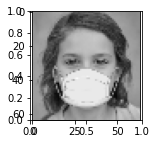

In [7]:
fig, ax = plt.subplots(figsize=(2,2))
y = x/255.0 - 0.5
y = np.reshape(y,(1,64,64,3))    
predictions = model.predict(y)
fig.add_subplot(1,1,1)
plt.imshow(x)
if np.argmax(predictions) == 0:
    print("Person wih Mask")
else:
    print("Person Without Mask")